In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve
from PIL import Image
import cv2
import xml.etree.ElementTree as ET
import plotly.express as px
import plotly.graph_objs as go


In [10]:
### load data
power_curve = pd.read_csv('./data/Cyclists power curve.csv')
### test if the data is loaded correctly
print(power_curve)

                5s      1min   5min     FT
0  TTS-Male      15.88   8.40   5.53  5.15
1  TTS-Female    15.11   8.29   5.31  4.70
2  SPR-Male      19.96   8.28   4.08  3.73
3  SPR-Female    16.19   7.75   3.93  3.31


In [11]:
### TTS_male is the first line of the data, and so on
TTS_male = power_curve.iloc[0,:].values.tolist()[1:]
TTS_male = [i * 65 for i in TTS_male]
TTS_female = power_curve.iloc[1,:].values.tolist()[1:]
TTS_female = [i * 50 for i in TTS_female]
SPR_Male = power_curve.iloc[2,:].values.tolist()[1:]
SPR_Male = [i * 65 for i in SPR_Male]
SPR_Female = power_curve.iloc[3,:].values.tolist()[1:]
SPR_Female = [i * 50 for i in SPR_Female]


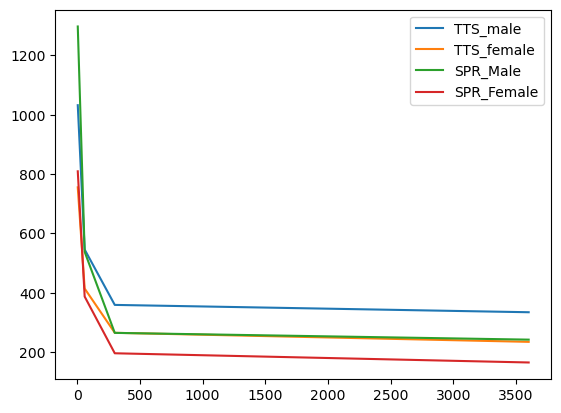

In [12]:
# then plot the power curve
labels = ["TTS_male", "TTS_female", "SPR_Male", "SPR_Female"]
P_actual = [TTS_male, TTS_female, SPR_Male, SPR_Female]
time_actual = [5, 60, 300, 3600]
for i in range(4):
    plt.plot(time_actual, P_actual[i], label=labels[i])

plt.legend(loc='upper right')
plt.show()


Solution (p_max, w, cp): [1249.21641458 8083.63636364  332.50454545]
The values of the three equations: [-2.50111042987555e-12, 0, 0]

Solution (p_max, w, cp): [ 839.05092858 9981.81831255  232.22727269]
The values of the three equations: [1.13686837721616e-13, 0, 0]

Solution (p_max, w, cp): [2082.87444425 7445.45454545  240.38181818]
The values of the three equations: [-7.73070496506989e-12, 0, 0]

Solution (p_max, w, cp): [  941.56625286 10145.45454656   162.68181818]
The values of the three equations: [1.13686837721616e-13, 0, 0]



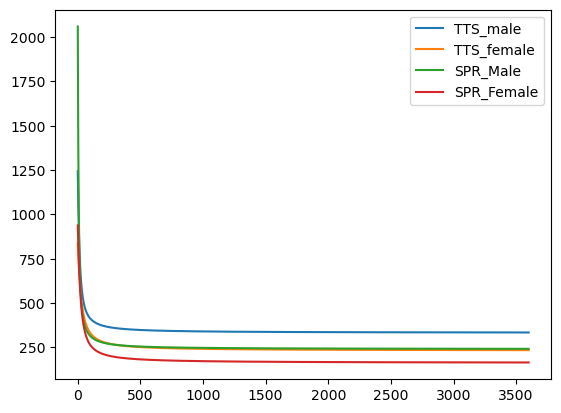

In [13]:
def f(x):
    p_max, w, cp = x
    return [w / t[i] * (1 - exp(-1 * t[i] * (p_max-cp) / w)) + cp - p[i] for i in [0, 2, 3]]


def OmPD(result, T):
    p_max, w, cp = result
    return [w / t * (1 - exp(-1 * t * (p_max-cp) / w)) + cp for t in T]


# The initial data for the preset is referenced from the image in the document 2022 MCM A
for i in range(4):
    t = time_actual
    p = P_actual[i]
    result = fsolve(f, [1200, 18000, 350])
    print("Solution (p_max, w, cp): {}".format(result))
    print("The values of the three equations: {}\n".format(f(result)))
    time_predict = np.linspace(0.1, 3600, num=3600)
    P_predict = OmPD(result, time_predict)
    plt.plot(time_predict, P_predict, label=labels[i])

plt.legend(loc='upper right')
plt.show()


(1000, 717)


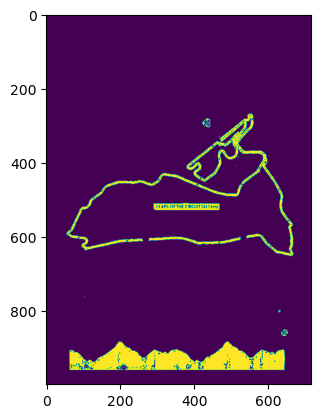

In [14]:
img_OTT_male = cv2.imread("./data/OTT_male.png")
grid_RGB = cv2.cvtColor(img_OTT_male, cv2.COLOR_BGR2RGB)
grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

lower1 = np.array([0, 43, 46])
upper1 = np.array([10, 255, 255])
mask1 = cv2.inRange(grid_HSV, lower1, upper1)
res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

lower2 = np.array([156, 43, 46])
upper2 = np.array([180, 255, 255])
mask2 = cv2.inRange(grid_HSV, lower2, upper2)
res2 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask2)

mask3 = mask1 + mask2
print(np.shape(mask2))
plt.imshow(mask2)

In [35]:
data_OTT = [[138.9272179421969,35.37309833012502,589.2628630194349],[138.9328747817586,35.37688413073894,588.9480231837301],[138.9335690235853,35.37702769279576,586.4424071186813],[138.9346102322168,35.37758619659094,577.8876002557859],[138.9349305295362,35.37760090471266,575.4942169369546],[138.9352494134017,35.37738042694576,572.4320097979598],[138.9354145043565,35.37609707282207,561.1766543442858],[138.9353483175886,35.37558644759811,557.2110056161198],[138.9350669789101,35.37510518381997,556.4790410074452],[138.9329284097053,35.37323359241464,553.4356375461348],[138.9319601278242,35.37226526601654,552.8174122375385],[138.9318461707128,35.37200556462565,552.657765143931],[138.931921598789,35.37169832404361,552.5083017589695],[138.9322998978952,35.37126644466386,551.3438868277549],[138.9330457570651,35.37044595102704,547.213697629658],[138.9335114761722,35.37024694437812,543.9253567033722],[138.9353283447186,35.37024282384058,530.5586138407539],[138.9368205624812,35.37027666861066,518.0194573023603],[138.9375308244067,35.37020485095677,511.5872023214725],[138.9381420189098,35.369909401048,506.6367067920065],[138.9384907318812,35.36949243164464,503.5177727600939],[138.9385518707137,35.36899039081728,499.8575480810646],[138.9386653552396,35.36839914136203,495.3303682234761],[138.9386428762592,35.36818718029617,494.3532641507667],[138.9381806962284,35.36766406216559,492.1910021064491],[138.9381572650579,35.36751804539696,491.3465833760585],[138.9391140543728,35.36636099436815,484.4858714765215],[138.9402933613081,35.36505394949693,479.0370706307569],[138.9418984506976,35.36282743819713,463.4174255751902],[138.9425095770144,35.36175471649152,453.2462696080032],[138.9424228154264,35.36096296825585,446.5758426601051],[138.9422287319661,35.36010666084965,448.1487963765205],[138.9423117715699,35.35918592762987,455.6219801586901],[138.9427216300274,35.35834882197231,463.4972872870857],[138.9433581838273,35.35761000905028,471.2674371294248],[138.944909238149,35.35608448287838,471.4156908089305],[138.944395449651,35.35557663367979,471.4700354834583],[138.9442953311127,35.35543799626781,471.9244031502712],[138.9445880686804,35.35479142023664,469.7986943912395],[138.9449359216316,35.35314031737768,463.8455788876589],[138.9447425298677,35.35280436523818,461.3555466275627],[138.9449364284992,35.35223398705497,459.4157887944085],[138.9445096544686,35.35140805715197,456.5189985141741],[138.9445870678332,35.35108530223575,452.3073913848447],[138.9450153873032,35.3503706178973,450.1752214272065],[138.9449892885538,35.3501020915031,450.3101145957197],[138.9449666171232,35.35006173003456,451.15491356238],[138.9440668680307,35.35021267792015,453.619615309329],[138.9411865765159,35.35074619424736,459.6148269438426],[138.9389197875085,35.3523275903315,469.2520616880109],[138.9378702100591,35.3534867007446,479.0463820261757],[138.9372555299798,35.35390337726353,484.089081936178],[138.9343235747208,35.35364089966276,500.7956351154229],[138.9292559446643,35.35273039371763,506.4443751001864],[138.9252865583471,35.35244775161282,516.0038080373585],[138.9226358014539,35.35237085077031,525.3199342808625],[138.9198570550469,35.35307149556242,538.1422277123944],[138.9182645978328,35.35341556047884,541.7911739868221],[138.9145206272622,35.35335988178843,549.1544379177344],[138.9041679882403,35.35288506896003,585.5345350303865],[138.8983941453267,35.35181168421993,611.3683406967382],[138.8961753248546,35.35142098604661,622.1070222159833],[138.8955855151096,35.35122149893914,624.7890658335016],[138.8954625691566,35.35150495154931,626.0277307856858],[138.8953073107921,35.35163877733601,628.1123692489001],[138.8949543676388,35.35178936238627,631.3789590209774],[138.8948205678236,35.35195597192705,635.6337891802513],[138.8948924324858,35.35210423660626,637.8665616734245],[138.8953585059293,35.35228508954351,642.7874926937702],[138.8957631810239,35.35259383600207,649.2480626984095],[138.8958797432654,35.35291668468474,651.7093741909591],[138.8957049769238,35.35320982346504,648.6118938098673],[138.8952048149687,35.35343099247318,655.1130280948358],[138.8938399123016,35.35356300738898,667.5152196866733],[138.8925064310353,35.35372134788932,668.3498761533955],[138.8911922476221,35.35438703368233,670.3084563899348],[138.8916250743356,35.35463560968982,668.9932706076107],[138.8917164387038,35.3550794338527,668.3677527893499],[138.8922238000697,35.35504510498907,668.6697848893383],[138.8926225117179,35.35576399248148,665.4026198214895],[138.8928045859205,35.35610572591671,663.769037287565],[138.8928918221506,35.3563256989628,662.9522460206028],[138.8930054480382,35.35650857902301,662.1354547536406],[138.8932150626755,35.3569390481664,657.2989459561603],[138.8935622119883,35.35745688948843,652.46243715868],[138.8942788258395,35.35863610134158,647.052441813233],[138.8946350775281,35.35917469184761,642.0264111961923],[138.8948673226955,35.35929124877052,640.6635740930665],[138.895414845229,35.35926756403084,636.6626613491401],[138.8957097096833,35.35932502761769,632.2024163981898],[138.8964612222337,35.35991017048438,630.1360821738721],[138.8967174430012,35.36051173086535,625.646582520386],[138.8968606267423,35.36080000808956,623.9626584744228],[138.8971133649212,35.3609997146166,622.0310130372909],[138.8973228970274,35.36111508441714,620.8456899917759],[138.8980608594106,35.3615693392731,619.2366739862407],[138.8988609012031,35.36198315140545,616.8627132749876],[138.8993674827091,35.3624110095842,615.5540537198277],[138.8997625322624,35.36289262356215,617.5553018542311],[138.9001713250648,35.36333418088145,617.426778312719],[138.9006980751289,35.36358412877587,616.655086882835],[138.9009062461248,35.36371249989089,615.6618010743199],[138.901284454939,35.36381653145043,611.571437630868],[138.9023185917582,35.36404783088153,609.9690601402135],[138.9030750865149,35.3643014066103,611.7294136215421],[138.9043112558608,35.36437601700883,610.9686916752451],[138.9053753990836,35.36434472607687,610.2565830007583],[138.9060804603721,35.36437359994638,608.4073772034448],[138.9067868370641,35.36423133264036,603.597530789359],[138.9074485773135,35.36425880376506,601.269189279118],[138.9085479788839,35.36447217134624,596.5739696829788],[138.9092947824708,35.36439783971596,593.3466085877262],[138.9112272799267,35.36389138707522,577.6888596620813],[138.9117562327624,35.36395155359317,576.9822184805801],[138.9130332018605,35.36455978810423,574.6915836722206],[138.9136644637974,35.36556145510101,574.5765733515811],[138.9140515026032,35.36579376993522,573.7586697693945],[138.914588275337,35.36583095003181,572.5844612414639],[138.9171114394375,35.36555507700125,575.0341063536008],[138.9211074292767,35.3642276588803,563.1533002336107],[138.9269932548914,35.36230107075833,531.3090355877679],[138.9293858810143,35.36189996887972,517.5261603846171],[138.9313532926273,35.36183320120212,505.0404224254211],[138.9316739662581,35.36182846922974,502.9634702434971],[138.9320768821905,35.36205362444228,499.6474955329571],[138.9323965850389,35.36309106745614,495.329707796286],[138.9327147008492,35.36361240715636,494.7116141079912],[138.9336787412108,35.36456993885757,499.9049743666725],[138.9346042329393,35.36510708324702,500.5861895448451],[138.9370419353508,35.3665166591918,491.7107178447308],[138.9369075760189,35.36675067453031,492.5750294528522],[138.9368510134369,35.36702936836263,494.9933168419003],[138.9373514863371,35.36742714796532,492.8409333198858],[138.9380120124104,35.36829384550941,494.6468973346756],[138.9384771783125,35.36894165262579,499.6428181847613],[138.9385825094164,35.36938887833188,504.1647922366836],[138.9382854366766,35.36992544298707,507.6166518196302],[138.9377269737951,35.37019810997215,511.4261672625648],[138.9367409858405,35.37028803542126,518.6677597929003],[138.9351997447895,35.37027468223184,531.6726649746199],[138.9335474521787,35.37030153809469,544.8103428249041],[138.9330580763907,35.37042736282679,547.8748159873135],[138.9319066693837,35.37164068990663,552.1633571882141],[138.9318759940994,35.37204099683879,552.6023529785512],[138.9319667727057,35.37236276015648,553.5121617728454],[138.9328992934391,35.37331883637619,552.8796108192892],[138.932118402929,35.37384850395367,557.3975637996275],[138.9313059464469,35.37335713055097,563.5682911509363],[138.9306812403331,35.3726543647014,571.9439846664989],[138.9297614259936,35.37200514703633,580.5128370400198],[138.9284908342835,35.37176189424645,582.6465486461165],[138.9279833576233,35.37173527132859,581.6872183898865],[138.9266412200972,35.37093399133761,577.4313450830301],[138.9256142991279,35.3700857678587,577.3093608230575],[138.9241966680592,35.36924340935447,576.9007387122368],[138.9238519663191,35.36935701413763,578.9561729461556],[138.9235511593793,35.36973447154186,582.7294653676194],[138.9306933231096,35.37445562094572,582.4513614369914],[138.9332433337724,35.37621893326813,580.4896061437817],[138.9334683064939,35.37635207123156,579.2098404567904],[138.9338129744209,35.37623385157485,576.8905820983515],[138.933625233296,35.37501892669756,566.6781318965056],[138.930948219798,35.37227043407837,563.9066341673298],[138.9318827184086,35.37040127479079,556.490032764671],[138.9314813089599,35.36937602316084,552.7795947290771],[138.9304804431729,35.36880103007681,554.7361004290088],[138.9295193530195,35.36925697667233,557.607948269518],[138.9282877619838,35.3707205217963,565.6333669026242],[138.9276649472972,35.37058187108817,565.7973414891467],[138.927513261566,35.36955656786993,562.3900117501396],[138.9276375592902,35.3679553148127,559.1444214574294],[138.9267851245983,35.36653964381963,552.6822100008873],[138.9241598092685,35.36476063994512,547.8356697887342],[138.923259261821,35.36507686536093,551.7820630514448],[138.9221690803529,35.36551219608093,560.3416099738995],[138.9216323050933,35.36610278390388,565.9784198481788],[138.9216240471561,35.36647418453938,568.0905774581996],[138.9223396584032,35.36669232223688,566.5580277891333],[138.9229093169898,35.36711884340824,567.360863116586],[138.9229417604697,35.36756275883462,568.7698788123106],[138.9227965648851,35.36789522443013,572.4701934994764],[138.9224769894818,35.36802385753549,574.0689141211916],[138.9220857329509,35.36772427298906,573.8169666843737],[138.9212564040197,35.3671383501471,574.8897390711516],[138.9206915542125,35.36697624609855,576.316116002565],[138.9200777065743,35.36715192882287,581.2440519020191],[138.9199980305707,35.36751325593294,583.1264256970494],[138.9209336680336,35.36814699781603,583.6877215181013],[138.9256715790487,35.37117248848902,583.3029228049513]]
data_OTT = np.array(data_OTT)

df_OTT = pd.DataFrame(data_OTT, columns=['Longitude', 'Latitude', 'Elevation'])
fig = go.Figure(go.Scatter3d(x=df_OTT['Longitude'], y=df_OTT['Latitude'], z=df_OTT['Elevation'], mode='lines'))

fig.update_layout(shapes=[shape])

fig.show()